## PROJECT : DIABETES PREDICTION MODEL

The objective of this Diabetes Prediction model is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## LIFE CYCLE OF A DATA SCIENCE PROJECT

### 1.)  Data Gathering

### 2.)  Data Analysis

### 3.)  Feature Engineering

### 4.)  Feature Selection 

### 5.)  Model Building

### 6.)  Hyperparametric Tuning

## 1.)  DATA GATHERING

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and I have taken it from Kaggle

In [1]:
# importing the required libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as plotly
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\Ram Baldotra\Downloads\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Insulin feature has (0) values, makes no sense. We will look upon this.

In [3]:
df.shape

(768, 9)

In [4]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

### 1 -> indicating Diabetic person
### 0 -> indicating Non-Diabetic person

##  -> Checking for Missing Values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values are there but we have seen Insulin feature has (0) values which make no sense. So we will check the count of 0 values in each feature.

## -> Counting the number of Zeros in each Feature

In [6]:
for column in df.columns:
    if column!="Outcome":
        print(column,"has",":-> {} zeros".format(df[df[column]==0].shape[0]))

Pregnancies has :-> 111 zeros
Glucose has :-> 5 zeros
BloodPressure has :-> 35 zeros
SkinThickness has :-> 227 zeros
Insulin has :-> 374 zeros
BMI has :-> 11 zeros
DiabetesPedigreeFunction has :-> 0 zeros
Age has :-> 0 zeros


#### We observe that there are some features like Pregnancies ,Glucose,BloodPressure,SkinThickness, Insulin , BMI that have (0)values

#### We will update all these records with median values of their respective features in FEATURE ENGINEERING.

In [7]:
df.groupby(["Pregnancies"])["Age"].mean()

Pregnancies
0     27.603604
1     27.370370
2     27.194175
3     29.026667
4     32.779412
5     39.035088
6     39.340000
7     41.111111
8     45.368421
9     44.178571
10    42.666667
11    44.545455
12    47.444444
13    44.500000
14    42.000000
15    43.000000
17    47.000000
Name: Age, dtype: float64

We observe that mean age of the females with 0 Pregnancy comes out to be 27.5 yrs and as this dataset is from Pima Heritage time which is very old so, it is hard to believe that in old times there were women with 0 Pregnancy around 27.5 yrs .So possibly these could be missing values which are replaced by 0.

## ->Checking Numerical Variables 

In [8]:
df.info()

## We have all continuous Numerical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## ->Counting the frequency of categories present in Outcome variable

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### It is a kind of imbalanced Dataset so we have to handle imbalance Dataset by using Sampling Techniques so that our algorithms won't give us biased results.

## 2.)  DATA  ANALYSIS

In [10]:
sn.set_style("whitegrid") # For adding white grid to all the plots #

### Plotting the output variable (Outcome)

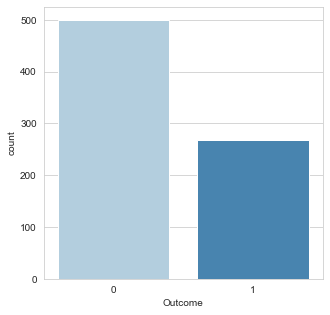

In [11]:
plt.figure(figsize=(5,5))
sn.countplot(data=df,x="Outcome",palette="Blues")

The ratio of Non-Diabetic to Diabetic Patients in our dataset is 2:1 ,therefore it is a kind of imbalanced dataset. 

### Plotting Histogram for 'Pregnancies'

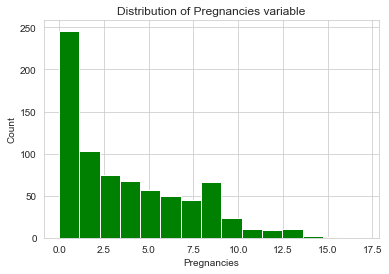

In [12]:
plt.hist(x=df["Pregnancies"],color="green",bins=15)
plt.xlabel("Pregnancies")
plt.title("Distribution of Pregnancies variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'Glucose'

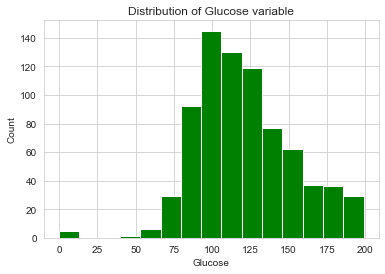

In [13]:
plt.hist(x=df["Glucose"],color="green",bins=15)
plt.xlabel("Glucose")
plt.title("Distribution of Glucose variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'BloodPressure'

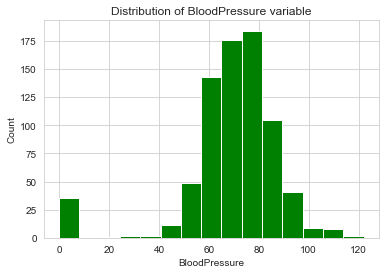

In [14]:
plt.hist(x=df["BloodPressure"],color="green",bins=15)
plt.xlabel("BloodPressure")
plt.title("Distribution of BloodPressure variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'SkinThickness'

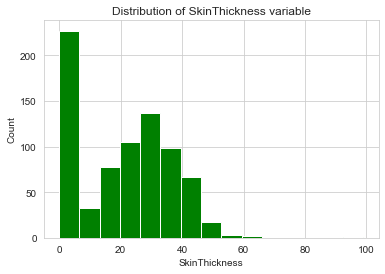

In [15]:
plt.hist(x=df["SkinThickness"],color="green",bins=15)
plt.xlabel("SkinThickness")
plt.title("Distribution of SkinThickness variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'Insulin'

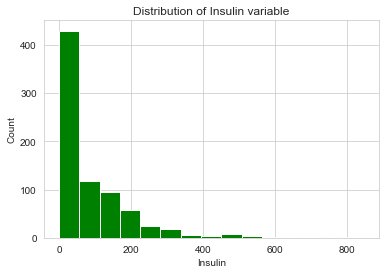

In [16]:
plt.hist(x=df["Insulin"],color="green",bins=15)
plt.xlabel("Insulin")
plt.title("Distribution of Insulin variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'BMI'

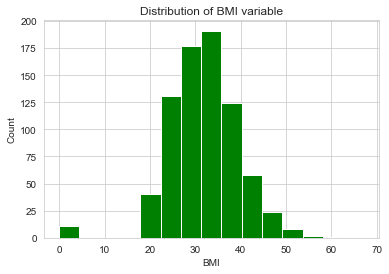

In [17]:
plt.hist(x=df["BMI"],color="green",bins=15)
plt.xlabel("BMI")
plt.title("Distribution of BMI variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'DiabetesPedigreeFunction'

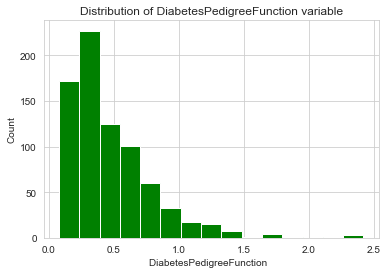

In [18]:
plt.hist(x=df["DiabetesPedigreeFunction"],color="green",bins=15)
plt.xlabel("DiabetesPedigreeFunction  ")
plt.title("Distribution of DiabetesPedigreeFunction variable")
plt.ylabel("Count")
plt.show()

### Plotting Histogram for 'Age'

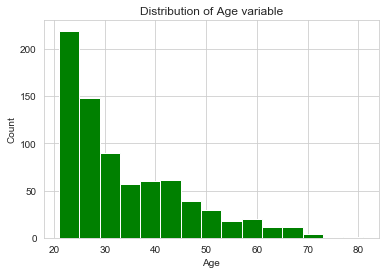

In [19]:
plt.hist(x=df["Age"],color="green",bins=15)
plt.xlabel("Age")
plt.title("Distribution of Age variable")
plt.ylabel("Count")
plt.show()

### Pregnancies vs Outcome

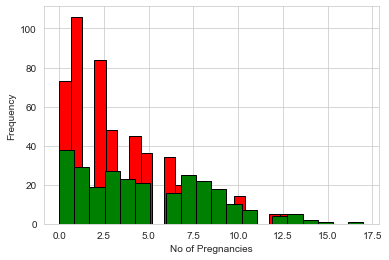

In [20]:
df[df["Outcome"]==0].Pregnancies.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].Pregnancies.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("No of Pregnancies")
plt.show()

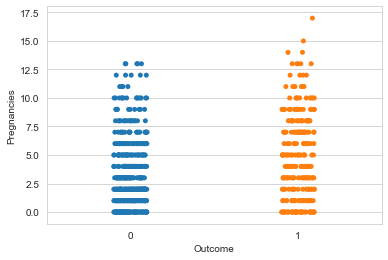

In [21]:
sn.stripplot(data=df,x="Outcome",y="Pregnancies")

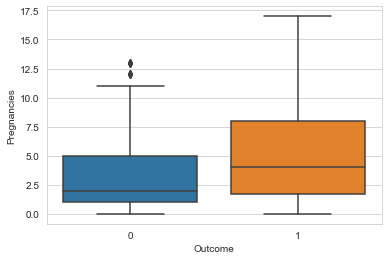

In [22]:
sn.boxplot(data=df,x="Outcome",y="Pregnancies")

 We can conclude from boxplot and stripplot that higher the number of pregnancies, higher is the risk of Diabetes.

### Glucose vs Outcome

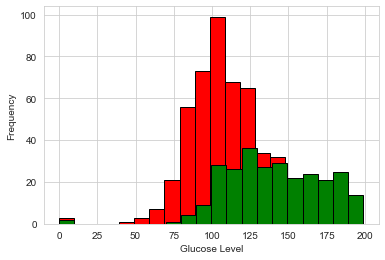

In [23]:
df[df["Outcome"]==0].Glucose.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].Glucose.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("Glucose Level")
plt.show()

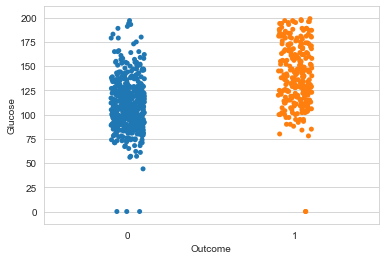

In [24]:
sn.stripplot(data=df,x="Outcome",y="Glucose")

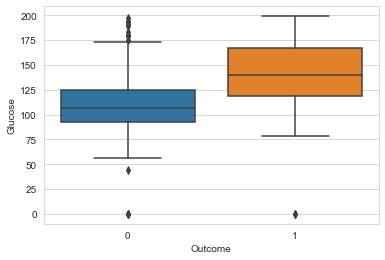

In [25]:
sn.boxplot(data=df,x="Outcome",y="Glucose")

We can conclude that higher Glucose level leads to more chances of Diabetes

### BloodPressure vs Outcome

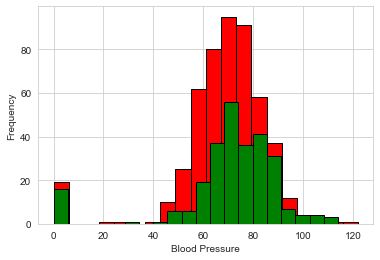

In [26]:
df[df["Outcome"]==0].BloodPressure.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].BloodPressure.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("Blood Pressure")
plt.show()

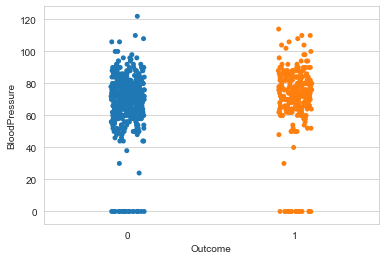

In [27]:
sn.stripplot(data=df,x="Outcome",y="BloodPressure")

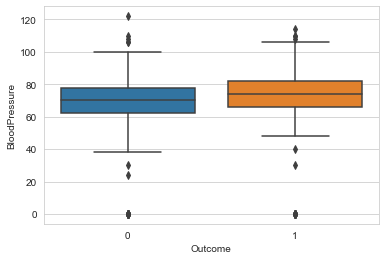

In [28]:
sn.boxplot(data=df,x="Outcome",y="BloodPressure")

Looking at the above plots we can see that the probabilty of diabetes is higher when Blood pressure is high.

### SkinThickness vs Outcome

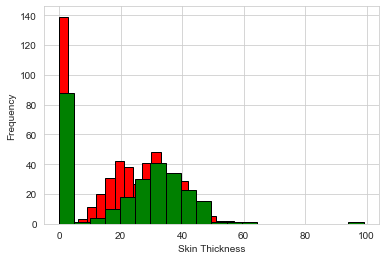

In [29]:
df[df["Outcome"]==0].SkinThickness.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].SkinThickness.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("Skin Thickness")
plt.show()

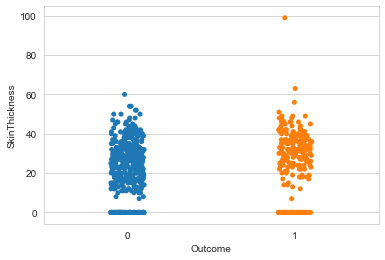

In [30]:
sn.stripplot(data=df,x="Outcome",y="SkinThickness")

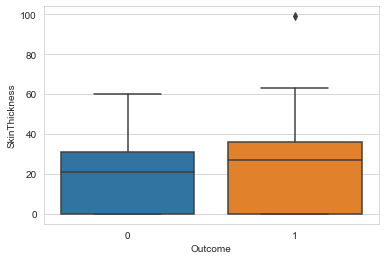

In [31]:
sn.boxplot(data=df,x="Outcome",y="SkinThickness")

We observe that Skin Thickness is slightly higher for Diabetic Patients.

### Insulin vs Outcome

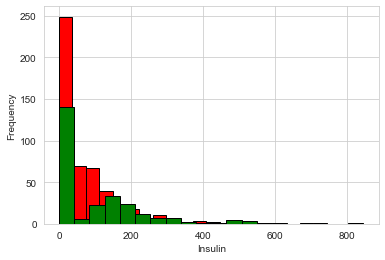

In [32]:
df[df["Outcome"]==0].Insulin.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].Insulin.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("Insulin")
plt.show()

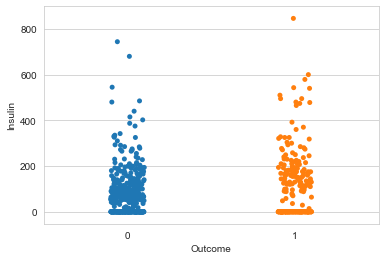

In [33]:
sn.stripplot(data=df,x="Outcome",y="Insulin")

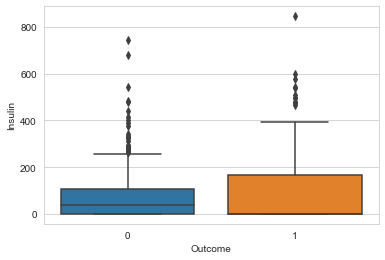

In [34]:
sn.boxplot(data=df,x="Outcome",y="Insulin")

 We can interpret that Insulin level for Diabetic patients is slightly higher than non Diabetic patients.

### BMI vs Outcome

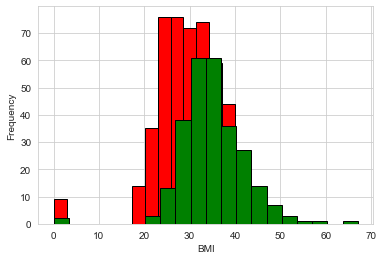

In [35]:
df[df["Outcome"]==0].BMI.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].BMI.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("BMI")
plt.show()

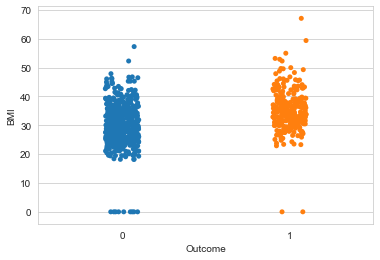

In [36]:
sn.stripplot(data=df,x="Outcome",y="BMI")

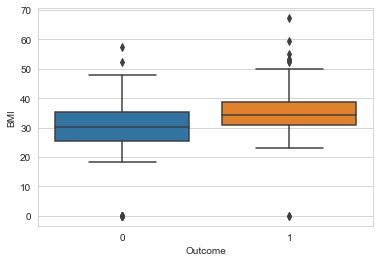

In [37]:
sn.boxplot(data=df,x="Outcome",y="BMI")

We observe that higher the BMI more chances of Diabetes.
Higher BMI means more fat and unhealthy Diet.

### DiabetesPedigreeFunction vs Outcome

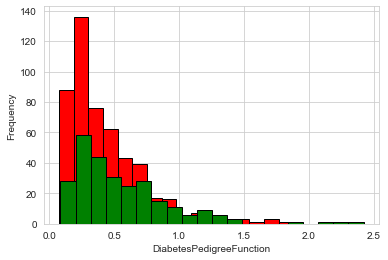

In [38]:
df[df["Outcome"]==0].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].DiabetesPedigreeFunction.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("DiabetesPedigreeFunction")
plt.show()

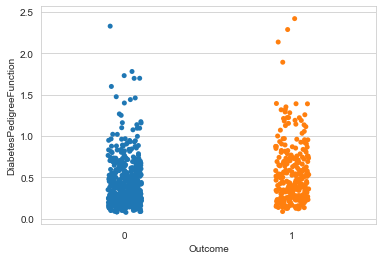

In [39]:
sn.stripplot(data=df,x="Outcome",y="DiabetesPedigreeFunction")

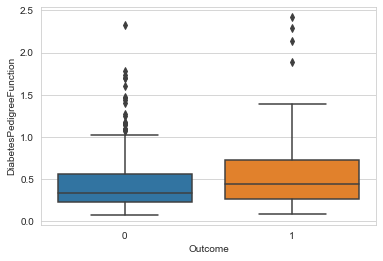

In [40]:
sn.boxplot(data=df,x="Outcome",y="DiabetesPedigreeFunction")

We observe that Diabetic people have higher Diabetes Pedigree Function value than non Diabetic people

### Age vs Outcome

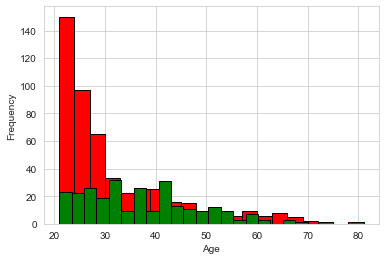

In [41]:
df[df["Outcome"]==0].Age.plot.hist(bins=20,edgecolor="black",color="red")
df[df["Outcome"]==1].Age.plot.hist(bins=20,edgecolor="black",color="green")
plt.xlabel("Age")
plt.show()

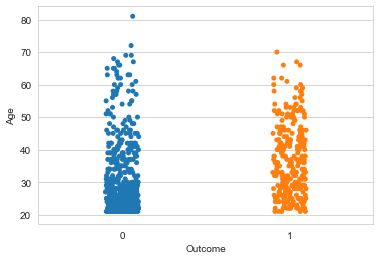

In [42]:
sn.stripplot(data=df,x="Outcome",y="Age")

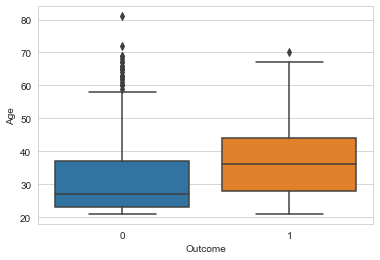

In [43]:
sn.boxplot(data=df,x="Outcome",y="Age")

We observe that there is less chance of diabetes among young people and more chances for the people having diabetes above the Age of years

## -> Plotting Correlation

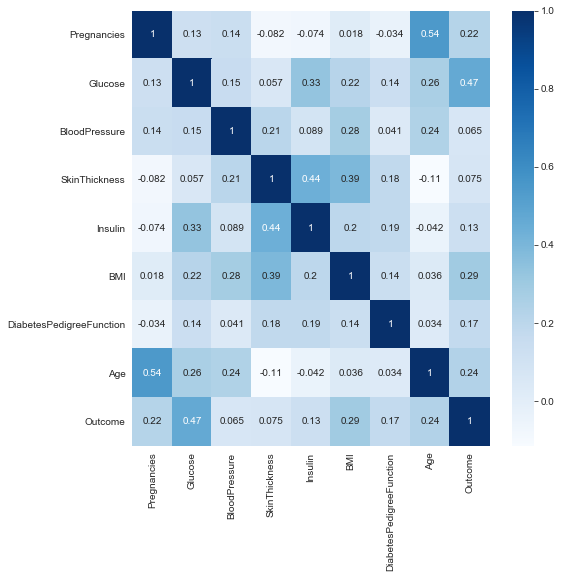

In [44]:
plt.figure(figsize=(8,8))
sn.heatmap(df.corr(),annot=True,cmap="Blues")

We don't have any strongly correlated independent features in our dataset

## -> FINDING OUTLIERS 

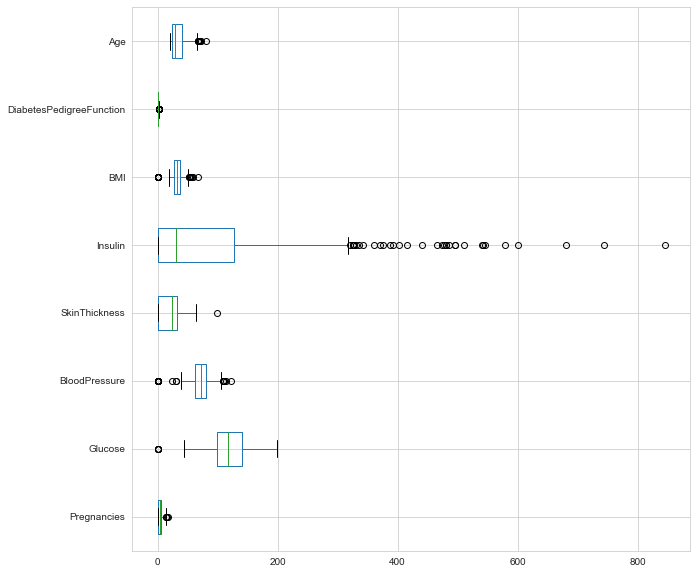

In [45]:
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)
plt.show()

 #### All the Features have Outliers so will handle them in the FEATURE ENGINEERING .

## 3.)  FEATURE  ENGINEERING

#### We have seen that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by median values of respective features as our dataset contains Outliers. 

In [46]:
## Just for reference printing the names of features that contain zero values
for column in df.columns:
    if column!="Outcome":
        print(column,"has",":-> {} zeros".format(df[df[column]==0].shape[0]))

Pregnancies has :-> 111 zeros
Glucose has :-> 5 zeros
BloodPressure has :-> 35 zeros
SkinThickness has :-> 227 zeros
Insulin has :-> 374 zeros
BMI has :-> 11 zeros
DiabetesPedigreeFunction has :-> 0 zeros
Age has :-> 0 zeros


### Replacing the 0 values in each feature by median values of respective features

In [47]:
for col in df.columns:
    if col!="Outcome" and col!="DiabetesPedigreeFunction" and col!="Age":
        df[col]=np.where(df[col]==0,df[col].median(),df[col])

In [48]:
for column in df.columns:
    if column!="Outcome":
        print(column,"has",":-> {} zeros".format(df[df[column]==0].shape[0]))

Pregnancies has :-> 0 zeros
Glucose has :-> 0 zeros
BloodPressure has :-> 0 zeros
SkinThickness has :-> 0 zeros
Insulin has :-> 0 zeros
BMI has :-> 0 zeros
DiabetesPedigreeFunction has :-> 0 zeros
Age has :-> 0 zeros


## ->  HANDLING  OUTLIERS

In [49]:
def Remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    return lower_limit,upper_limit
    

In [50]:
for col in df.columns:
    if col!="Outcome":
        lr,ur=Remove_outlier(df[col])
        df[col]=np.where(df[col]<lr,lr,df[col])
        df[col]=np.where(df[col]>ur,ur,df[col])

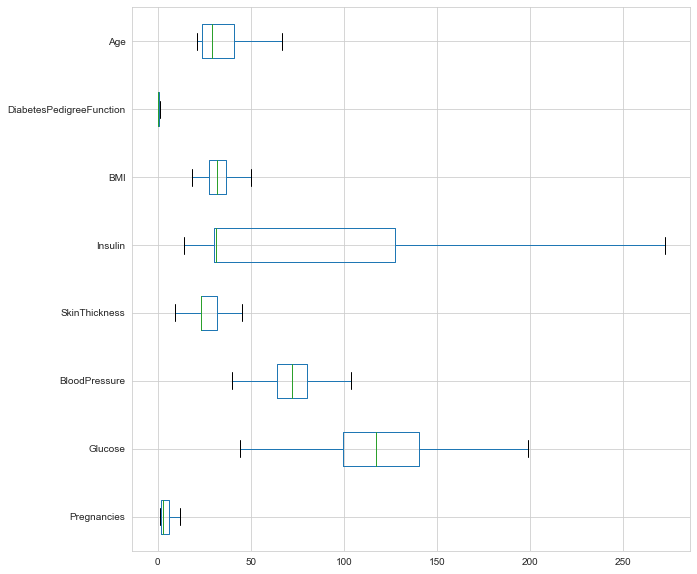

In [51]:
plt.figure(figsize=(10,10))
df.iloc[:,:8].boxplot(vert=0)
plt.show()

Now all the Outliers have been REMOVED.

## -> FEATURE  SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_scaled=df.iloc[:,:8].copy()
df_scaled=pd.DataFrame(min_max.fit_transform(df_scaled),columns=df.columns[0:8])
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.454545,0.670968,0.50000,0.708333,0.063861,0.480499,0.489305,0.637363
1,0.000000,0.264516,0.40625,0.541667,0.063861,0.262090,0.243316,0.219780
2,0.636364,0.896774,0.37500,0.375000,0.063861,0.159126,0.529412,0.241758
3,0.000000,0.290323,0.40625,0.375000,0.309627,0.308892,0.079323,0.000000
4,0.181818,0.600000,0.00000,0.708333,0.596033,0.776911,1.000000,0.263736


In [53]:
df_scaled.shape
## Now we have made a copy of our old dataframe and scale down its all the input features

(768, 8)

###  SPLITTING THE DATASET INTO TRAINING  AND  TEST SET ( 70- 30 )

In [54]:
X=df_scaled.iloc[:,:8]
Y=df["Outcome"]

## train_test_split which ensures the training and test sets (while keeping balanced) ##
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
#stratify=Y

## 5.)  MODEL  BUILDING  :-

### 1. LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [56]:
print("Accuracy on test set:",lr.score(x_test,y_test))

Accuracy on test set: 0.7532467532467533


In [57]:
pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

[[138  17]
 [ 40  36]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       155
           1       0.68      0.47      0.56        76

    accuracy                           0.75       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



### 2. DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
print("Accuracy on test set:",dt.score(x_test,y_test))

Accuracy on test set: 0.7402597402597403


In [60]:
pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

[[126  29]
 [ 31  45]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       155
           1       0.61      0.59      0.60        76

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



### 3. KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

### Finding the optimal value of K

In [62]:
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

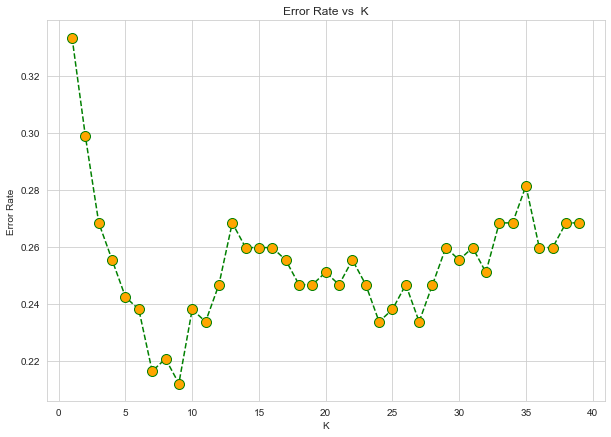

In [63]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,marker="o",color="green",markerfacecolor="orange" ,linestyle="dashed",markersize="10")
plt.title("Error Rate vs  K")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

### So we will use K= 19 because we are getting lowest error rate for this value of K

In [64]:
Knn=KNeighborsClassifier(n_neighbors=9)
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [65]:
print("Accuracy on test set:",Knn.score(x_test,y_test))

Accuracy on test set: 0.7878787878787878


In [66]:
pred_Knn=Knn.predict(x_test)
print(confusion_matrix(y_test,pred_Knn))
print(classification_report(y_test,pred_Knn))

[[138  17]
 [ 32  44]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       155
           1       0.72      0.58      0.64        76

    accuracy                           0.79       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.79      0.78       231



### 4. SVM

In [67]:
from sklearn.svm import SVC
Svm=SVC(kernel="poly")
Svm.fit(x_train,y_train)

SVC(kernel='poly')

In [68]:
print("Accuracy on test set:",Svm.score(x_test,y_test))

Accuracy on test set: 0.7705627705627706


In [69]:
pred_Svm=Svm.predict(x_test)
print(confusion_matrix(y_test,pred_Svm))
print(classification_report(y_test,pred_Svm))

[[142  13]
 [ 40  36]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       155
           1       0.73      0.47      0.58        76

    accuracy                           0.77       231
   macro avg       0.76      0.69      0.71       231
weighted avg       0.77      0.77      0.75       231



### 5. RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [71]:
print("Accuracy on test set:",rf.score(x_test,y_test))

Accuracy on test set: 0.7619047619047619


In [72]:
pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[135  20]
 [ 35  41]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       155
           1       0.67      0.54      0.60        76

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.76      0.75       231



We have observed LOW recall from all the models

 In our problem our main focus is on high recall . Because we want a model that minimizes the errors in which it classifies a diabetic person as non-diabetic because if this happen so, how can we treat those persons who have diabeties but are wrongly classified by our model as non-diabetic.

##  -> HANDLING  IMBALANCED  DATASET :-

## Using SMOTETomek

In [73]:
from imblearn.combine import SMOTETomek

In [74]:
sm=SMOTETomek(0.75)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

C:\Users\Ram Baldotra\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


### 1. RANDOM FOREST

In [75]:
rf=RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [76]:
print("Accuracy on test set:",rf.score(x_test,y_test))

Accuracy on test set: 0.7878787878787878


In [77]:
pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

[[133  22]
 [ 27  49]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       155
           1       0.69      0.64      0.67        76

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.79      0.79       231



### 2. KNN 

In [80]:
Knn=KNeighborsClassifier(n_neighbors=9)
Knn.fit(x_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=9)

In [81]:
print("Accuracy on test set:",Knn.score(x_test,y_test))

Accuracy on test set: 0.7792207792207793


In [82]:
pred_Knn=Knn.predict(x_test)
print(confusion_matrix(y_test,pred_Knn))
print(classification_report(y_test,pred_Knn))

[[127  28]
 [ 23  53]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       155
           1       0.65      0.70      0.68        76

    accuracy                           0.78       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.78      0.78       231



### 3. LOGISTIC REGRESSION

In [83]:
lr=LogisticRegression()
lr.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [84]:
print("Accuracy on test set:",lr.score(x_test,y_test))

Accuracy on test set: 0.7662337662337663


In [85]:
pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

[[132  23]
 [ 31  45]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       155
           1       0.66      0.59      0.62        76

    accuracy                           0.77       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



### 4. DECISION TREE

In [86]:
dt=DecisionTreeClassifier()
dt.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [87]:
print("Accuracy on test set:",dt.score(x_test,y_test))

Accuracy on test set: 0.70995670995671


In [88]:
pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

[[121  34]
 [ 33  43]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       155
           1       0.56      0.57      0.56        76

    accuracy                           0.71       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.71      0.71      0.71       231



### 5. SVM

In [89]:
Svm=SVC(kernel="poly")
Svm.fit(x_train_sm,y_train_sm)

SVC(kernel='poly')

In [90]:
print("Accuracy on test set:",Svm.score(x_test,y_test))

Accuracy on test set: 0.7489177489177489


In [91]:
pred_Svm=Svm.predict(x_test)
print(confusion_matrix(y_test,pred_Svm))
print(classification_report(y_test,pred_Svm))

[[134  21]
 [ 37  39]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       155
           1       0.65      0.51      0.57        76

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



## 6.) HYPERPARAMETERIC  TUNING :-

### USING RANDOMIZED SEARCH CV

In [96]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold,GridSearchCV

In [138]:
# output function will calculate predicted y , compute confusion matrix , score,
# classification report 

# recall_list will contain list of recall values 
recall_list = []
# confusion_mat_list will contain list of confusion matrix
confusion_mat_list = []

def output(model):
    y_pred = model.predict(x_test)
    
    global recall ,confusion_mat_list
    conf_mat = confusion_matrix(y_test,y_pred)
    recall = round((conf_mat[1][1]) / (conf_mat[1][0]+conf_mat[1][1]), 3)
    recall_list.append(recall)
    confusion_mat_list.append(conf_mat)

    print('Confusion Matrix is ')
    print(confusion_matrix(y_test,y_pred))
    print()
    print('Score is ')
    print(model.score(x_test,y_test))
    print()
    print('Classification Report')
    print(classification_report(y_test,y_pred))

In [139]:
# here hypertuning of the parameters to get best accuracy model by grid search cv as well 
# as using StratifiedKfold too
# and then fitting the model 

def hyperparametric_tuning(model , parameters,x_train_sm,y_train_sm):
    cv = StratifiedKFold(n_splits=10,random_state=None)
    #making object random public
    global random 
    random=RandomizedSearchCV(estimator=model,
                          param_distributions=parameters,
                          n_jobs=-1,
                          cv=cv,
                          verbose=1,
                          scoring="recall"
                         )
    #fitting the model
    random.fit(x_train_sm,y_train_sm)

### APPLYING LOGISTIC REGRESSION

In [140]:
parameters = {'C' : 10.0** np.arange(-2,3),'penalty': ['l1','l2']}

In [141]:
hyperparametric_tuning(LogisticRegression() , parameters,x_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.0298913         nan 0.60724638        nan 0.6826087
        nan 0.70778986        nan 0.70362319]
  category=UserWarning


In [142]:
output(random)

Confusion Matrix is 
[[131  24]
 [ 28  48]]

Score is 
0.631578947368421

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       155
           1       0.67      0.63      0.65        76

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



### APPLYING KNN

In [143]:
parameters=[{"weights":["uniform","distance"],
             "algorithm":["ball_tree","kd_tree","brute","auto"],
             "leaf_size":[20,25,30,35,40],
             "p":[1,2]}]

In [144]:
hyperparametric_tuning(KNeighborsClassifier(n_neighbors=9) , parameters,x_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [145]:
output(random)

Confusion Matrix is 
[[126  29]
 [ 24  52]]

Score is 
0.6842105263157895

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       155
           1       0.64      0.68      0.66        76

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.77      0.77       231



### APPLYING RANDOM FOREST  

In [146]:
parameters=[{"n_estimators":[50,70,90,110],
            "criterion":["gini", "entropy"],
             "max_depth":[15,20,25],
             "min_samples_split":[1,2,4],
             "max_features":["auto", "sqrt", "log2"],
             "min_samples_leaf":[1,2,4],
             "random_state":range(1,20,2),
            }]

In [147]:
hyperparametric_tuning(RandomForestClassifier(), parameters,x_train_sm,y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.77119565        nan        nan 0.74963768 0.75416667 0.76268116
 0.77119565        nan 0.77083333 0.74130435]
  category=UserWarning


In [148]:
output(random)

Confusion Matrix is 
[[132  23]
 [ 21  55]]

Score is 
0.7236842105263158

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       155
           1       0.71      0.72      0.71        76

    accuracy                           0.81       231
   macro avg       0.78      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



### APPLYING SVM 

In [149]:
parameters = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
       'gamma': ['auto',0.001,0.002,0.003,0.004,0.005],
       'decision_function_shape' : ['ovo', 'ovr'] ,
       'C' : [i for i in np.arange(1.0,10.0)],
       'degree' : [i for i in range(3,10)]
       }]

In [150]:
hyperparametric_tuning(SVC(), parameters, x_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [151]:
output(random)

Confusion Matrix is 
[[132  23]
 [ 32  44]]

Score is 
0.5789473684210527

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       155
           1       0.66      0.58      0.62        76

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



### APPLYING DECISION TREE ALGORITHM

In [152]:
parameters = {"criterion" : ["gini", "entropy"],
             "max_depth" : range(1,24,3),
             "min_samples_split":[1,2,4],
             "max_features":["auto", "sqrt", "log2"],
             "min_samples_leaf":[1,2,4],
             }

In [153]:
hyperparametric_tuning(DecisionTreeClassifier(), parameters, x_train_sm, y_train_sm)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ram Baldotra\anaconda3\conda\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.59855072        nan 0.57282609 0.71286232 0.64891304
        nan        nan 0.69945652        nan]
  category=UserWarning


In [154]:
output(random)

Confusion Matrix is 
[[114  41]
 [ 29  47]]

Score is 
0.618421052631579

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       155
           1       0.53      0.62      0.57        76

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231



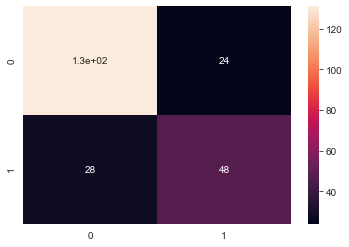

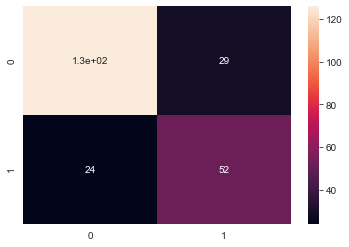

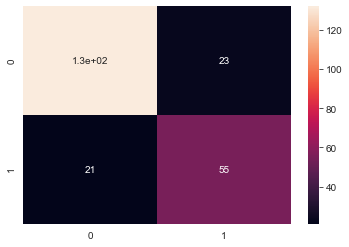

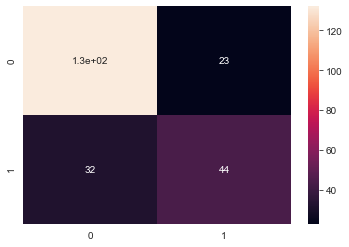

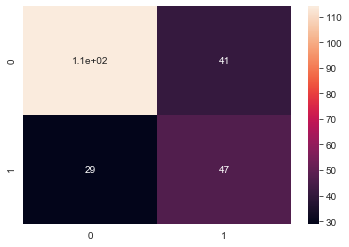

In [159]:
## let's visualise the confusion matrix for each of the hyper tuned models 

for con_mat in confusion_mat_list:
    sn.heatmap(con_mat,annot=True)
    plt.show()

In [160]:
recall_list

[0.632, 0.684, 0.724, 0.579, 0.618]

In [161]:
models_list=["Logistic Regression","KNN","Random Forest","SVM","Decision Tree"]

<BarContainer object of 5 artists>

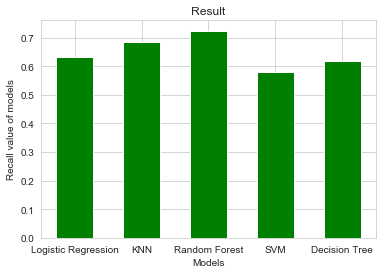

In [174]:
plt.xlabel("Models")
plt.ylabel("Recall value of models")
plt.title("Result")
plt.bar(models_list,recall_list,color="green",width=0.55)

### Result :

Random Forest has given the higest recall : 0.724 It implies that this algorithm predicts the most true positive values  i.e.( predicts most Diabetic patients from our data set )

SO AT THE END ,

### RESULT is RANDOM FOREST AFTER USING SMOTOMEK METHOD AND THEN HYPER TUNING GIVES THE HIGHEST RECALL